In [2]:
# 超参数
# COLS_Y1= '305_price'
# COLS_Y2= 'perRefuelLiters'
# COLS_X = 'date'

COLS_ALL = ['date', '305_order_cnt', '305_amount', '305_refuelLiters', '305_price', 'high',  'encoded_holidays', 'holidays']

import pandas as pd


# 读取excel文件并获取指定列
#df_uncleaned = pd.read_csv('Data/结果1_全站按日期分组_2023全年.csv', usecols=COLS_ALL)
df_uncleaned = pd.read_csv('Data\结果1_全站按日期分组_2023全年.csv', usecols=COLS_ALL, encoding='GBK')
# 删除包含空值的行
df = df_uncleaned.dropna()
print(df)

df['305_PerLiters'] = df['305_refuelLiters'] / df['305_order_cnt']
df.drop(columns=['305_refuelLiters', 'high'], inplace=True)




           date  high holidays  encoded_holidays  305_price  305_order_cnt  \
0      2023-1-1     8       元旦                 1       7.54         546095   
1      2023-1-2     9       元旦                 1       7.54         635905   
2      2023-1-3     9       平时                 4       7.54         700728   
3      2023-1-4    12       平时                 4       7.74         499980   
4      2023-1-5    13       平时                 4       7.74         514479   
..          ...   ...      ...               ...        ...            ...   
359  2023-12-26     9       平时                 4       7.50         598525   
360  2023-12-27    12       平时                 4       7.50         584640   
361  2023-12-28    12       平时                 4       7.50         579368   
362  2023-12-29    12       平时                 4       7.50         682637   
363  2023-12-30    14       平时                 4       7.50         643768   

      305_amount  305_refuelLiters  
0    123147634.4       163

d:\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from current font.
  fig.canvas.draw()
d:\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 26086 (\N{CJK UNIFIED IDEOGRAPH-65E6}) missing from current font.
  fig.canvas.draw()
d:\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.draw()
d:\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.draw()
d:\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 26149 (\N{CJK UNIFIED IDEOGRAPH-6625}) missing from current font.
  fig.canvas.draw()
d:\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from current font.
  fig.canvas.draw()
d:\Python312\Lib\site-packages\seaborn\utils.py:61: UserWa

<Figure size 800x640 with 0 Axes>

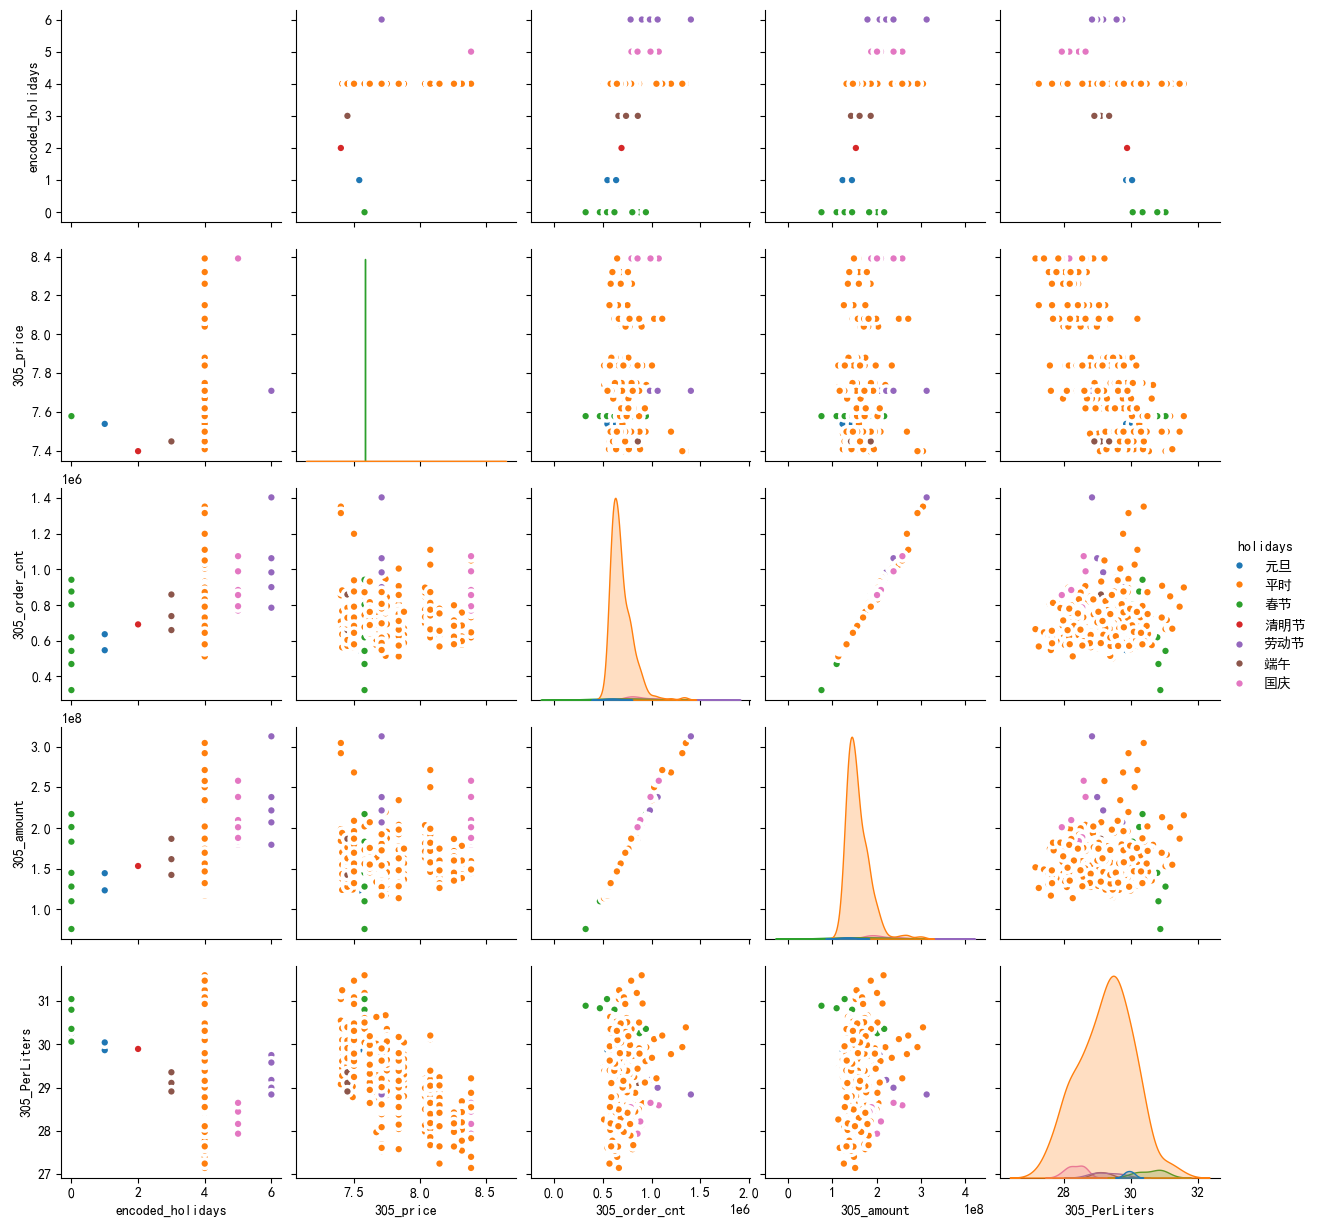

In [3]:
# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(
    df, 
    kind="scatter",     # "scatter" 散点图、 "reg"（绘制带有回归线的散点图）、"resid"（绘制残差图）、"kde"（绘制核密度估计图）等。
    hue="holidays",      # 按 名为 species 的列的类别着色。
    plot_kws=dict(
        s=50,               # 散点图点的大小
        edgecolor="white",  # 散点图边框颜色
        linewidth=2.5)      # 散点图边框宽度
    )

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体，确保能正确显示汉字
plt.show()

In [4]:
# 去掉节假日
# df_new = df[df['encoded_holidays']== 4]
# data = df_new['305_order_cnt']

# 不去节假
data = df['305_order_cnt']
#data = df['305_refuelLiters'] / df['305_order_cnt']


#data = data.head(120)
print(data)

0      546095
1      635905
2      700728
3      499980
4      514479
        ...  
359    598525
360    584640
361    579368
362    682637
363    643768
Name: 305_order_cnt, Length: 364, dtype: int64


C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


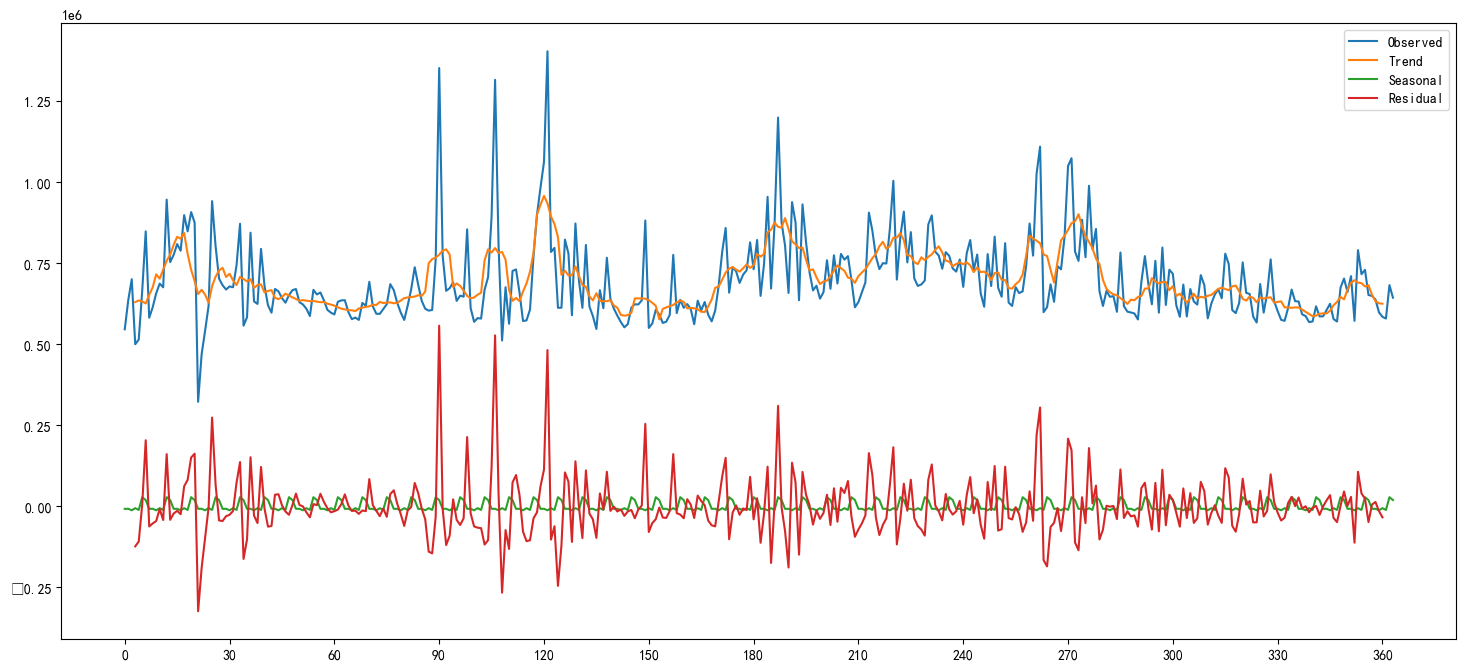

In [5]:
import statsmodels.api as sm

#进行时间序列分析
rd = sm.tsa.seasonal_decompose(
    data,               # 要分解的时间序列数据
    model="additive",   # 分解模型，可以是 'additive' （加法）或 'multiplicative'（乘法）。在加法模型中，季节性波动是固定的，而在乘法模型中，季节性波动会随着趋势的增长而增长。
    filt=None,          # 最小二乘滤波器系数
    period=7,          # 时间序列的季节周期，如果未指定，则自动检测。如果手动指定即是指多少个数据点构成一个季节周期。（例如，每天一个数据点，则每星期周期为7）
    two_sided=True,     # 是否使用双侧滤波器
    extrapolate_trend=0,# 在不充分观察到较长时间趋势的情况下，是否应该扩展趋势组件
    )

import matplotlib.ticker as ticker
# 绘制分解结果
fig, ax = plt.subplots(
    figsize = (18,8),   # 设置图片大小
    dpi = 100            # 精度
    ) #

# 绘制原始数据
ax.plot(rd.observed, label='Observed')

# 绘制趋势
ax.plot(rd.trend, label='Trend')

# 绘制季节性
ax.plot(rd.seasonal, label='Seasonal')

# 绘制残差
ax.plot(rd.resid, label='Residual')

# 设置图例
ax.legend()

# 设置X轴的刻度间隔,避免太密集
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=30))

plt.show()


0                NaN
1                NaN
2                NaN
3      623959.807184
4      623619.775833
           ...      
359    613693.801043
360    619060.521470
361              NaN
362              NaN
363              NaN
Length: 364, dtype: float64


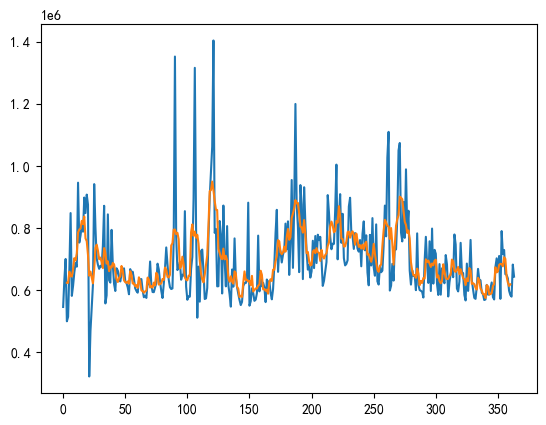

In [6]:

plt.show()
#得到趋势、周期性、随机变量的数据输出
#print(rd.trend)
#print(rd.seasonal)
#print(rd.resid)
print(rd.trend+rd.seasonal)
plt.plot(data)
plt.plot(rd.trend+rd.seasonal)
plt.show()